原文代码作者：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.6

代码全部测试通过。
![gongzhong](../gongzhong.jpg)

# 第1章 统计学习方法概论

高斯于1823年在误差e1 ,… , en独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！

### 使用最小二乘法拟和曲线

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正太分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [6]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq #模块提供了许多数值优化算法,leastsq()对数据进行最小二乘拟合计算。 leastsq()的用法很简单，只需要将计箅误差的函数和待确定参数的初始值传递给它即可。
import matplotlib.pyplot as plt
%matplotlib inline


*ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [7]:
#三个函数,计算sin的,计算多项式的,计算两者差值的,最小二乘法
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 用多项式拟合,p代表系数,x表示自变量
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 真实值和拟合值之差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [8]:
# 十个点
x = np.linspace(0, 1, 10)#是为了添加噪声,散点
x_points = np.linspace(0, 1, 1000) #这个是为了画出sin图像选了1000个点,点越多越准确
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_] #在sin的基础上加了噪音

def fitting(M=0):
    """
    M 为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real') #sin曲线
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')#拟合的曲线
    plt.plot(x, y, 'bo', label='noise')#位于sin曲线周围的噪声点
    plt.legend()
    return p_lsq

Fitting Parameters: [0.02050881]


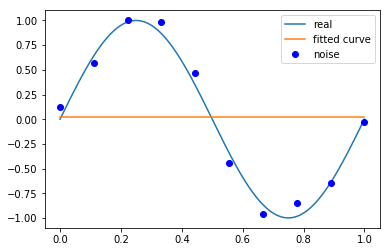

In [9]:
# M=0 水平线
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.4112063   0.72611195]


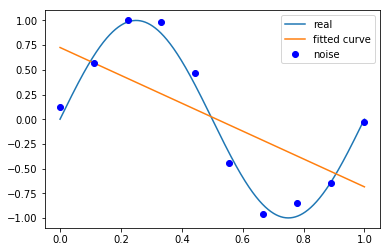

In [10]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 2.07635463e+01 -3.11261002e+01  1.03868520e+01  1.12070321e-02]


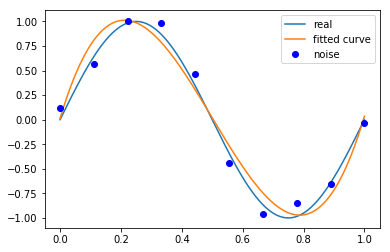

In [11]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-7.41152825e+03  3.53379181e+04 -7.01463562e+04  7.51381478e+04
 -4.71665067e+04  1.77112572e+04 -3.89687029e+03  4.49856312e+02
 -1.60680595e+01  1.18867547e-01]


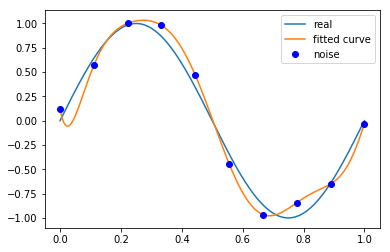

In [12]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [13]:
regularization = 0.0001 #lambda

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret

In [14]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9+1) #多项式参数,多了一个
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

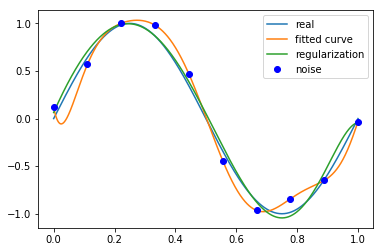

In [15]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()